## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

**Setup instructions for a reference Python Environment can be found on the [Github page](https://github.com/ac3-tr/ac3-notebooks)**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy, os
from netCDF4 import Dataset
%matplotlib inline

# OCEANET-ATMOSPHERE PollyXT measurements during POLARSTERN cruise PS106


## Dataset resources

**Title:** OCEANET-ATMOSPHERE PollyXT measurements during POLARSTERN cruise PS106

**Author** Griesche, Hannes; Seifert, Patric; Engelmann, Ronny; Radenz, Martin; Bühl, Johannes

**Year** 2019

**Institute** Tropos, Leipzig

**Data hosted by** [PANGAEA](https://pangaea.de)

**DOI** [10.1594/PANGAEA.899458](https://doi.org/10.1594/PANGAEA.899458)

**License** [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")


## Abstract
The dataset contains daily nc-files of the attenuated backscatter coefficient and volume depolarization from the OCEANET multiwavelength Raman and polarization lidar PollyXT (Engelmann et al., 2016, doi:10.5194/amt-9-1767-2016; Baars et al., 2017, doi:10.5194/amt-10-3175-2017) during Polarstern cruise PS106.

The data is calibrated within the Cloudnet (Illingworth, 2007 doi:10.1175/BAMS-88-6-883) processing scheme.


## Reading example dataset

The list of binary NetCDF files can be downloaded via the link above and saved in the current working directory of this notebook. After checking the headersize of the ASCII file, the table can be read as a NumPy record array. The print statement checks the loaded fields in the recarray.

In [24]:
datafolder = '../ac3/INF/pangaea_download/'
datasetlist = np.recfromtxt(os.path.join(datafolder, 'Griesche-etal_2019.tab'), skip_header=23, delimiter='\t', names=True, encoding='utf8')
print (datasetlist.dtype.names)

('Event', 'DateTime', 'File_name', 'File_format', 'File_size_kByte', 'URL_file')


As an example we can download one file in the collection, using a *wget* if your system supports it. If not, you can go to the link printed and downloaded manually.

In [8]:
url = datasetlist['URL_file'][0]
fname = url[url.rfind('/')+1:]
print ('Downloading ... ', url)
try:
    if not os.path.exists(os.path.join(datafolder,fname)):
        os.system('wget -O '+os.path.join(datafolder,fname)+' '+url)
        print ('Download finished')
    else:
        print ('File already there...')
except:
    print ('Could not download automatically, please try manual download!')

File already there...


## Read in the downloaded NetCDF file


In [9]:
fname = url[url.rfind('/')+1:]
rootgrp = Dataset(os.path.join(datafolder,fname), 'r', format="NETCDF4")
print (rootgrp.variables.keys())


odict_keys(['time', 'height', 'range', 'wavelength', 'Calibration_constant', 'Depolarization_calibration_constant', 'latitude', 'longitude', 'altitude', 'elevation', 'azimuth', 'lidar_beam_divergence', 'lidar_telescope_field_of_view', 'att_beta_0355', 'quality_mask_0355', 'att_beta_0532', 'quality_mask_0532', 'att_beta_0532_nf', 'quality_mask_0532_nf', 'att_beta_0355_nf', 'quality_mask_0355_nf', 'att_beta_1064', 'quality_mask_1064', 'volume_depolarization', 'quality_mask_volume_depolarization', 'att_beta_0387', 'quality_mask_0387', 'att_beta_0607', 'quality_mask_0607', 'att_beta_0407', 'quality_mask_0407', 'SNR_0355', 'SNR_0532', 'SNR_1064', 'SNR_0532x', 'SNR_0387', 'SNR_0607', 'SNR_0407', 'bg_0355_t', 'bg_0532_t', 'bg_1064_t', 'bg_0532_x', 'bg_0387_t', 'bg_0607_t', 'bg_0407_t'])


In [19]:
par = 'att_beta_0407'
pardescription = rootgrp.variables[par].long_name+' ['+rootgrp.variables[par].units+']'
print (pardescription)
p = rootgrp.variables[par][:]
print (p.shape)
#p = p[~np.isnan(p)]
          
height = rootgrp.variables['height'][:]
time = rootgrp.variables['time'][:]
print (time.shape, height.shape)

att_beta_0407 (Attenuated backscatter coefficient (407 nm)) [sr-1 m-1]
(573, 2400)
(573,) (2400,)


In [33]:
rootgrp.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: hours since 20170524 00:00:00 +00:00
    long_name: Decimal hours from midnight UTC to the middle of each ray
    axis: T
    missing_value: -999.0
    _FillValue: -999.0
unlimited dimensions: 
current shape = (573,)
filling on

## Overview plot

As an overview, the data fields can be plotted against flight time. Time is converted from seconds to hours.

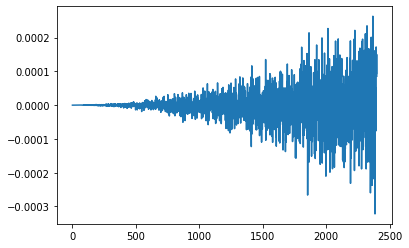

In [21]:
plt.plot(p[0,:])

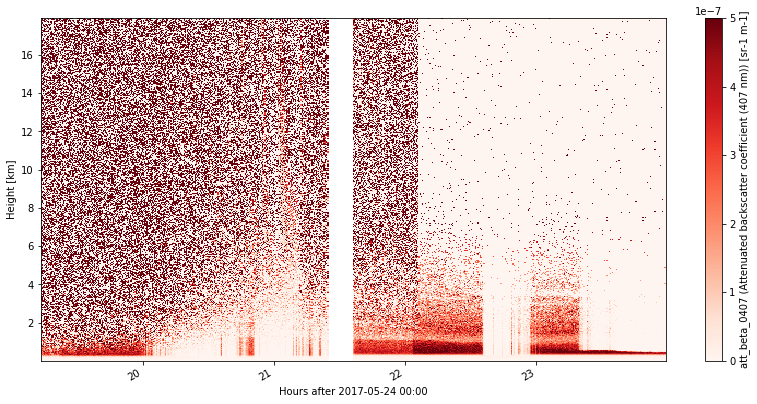

In [83]:
Time, Height = np.meshgrid(time.flatten(), height.flatten())

fig, ax = plt.subplots(1, figsize=(14,7))
ax.set_ylabel('Height [km]')
ax.set_xlabel('Hours after 2017-05-24 00:00')
con = ax.pcolormesh(Time, Height/1e3, p.T, cmap=plt.get_cmap('Reds'), vmin=0, vmax=5e-7)
fig.colorbar(con, label=pardescription)
fig.autofmt_xdate()

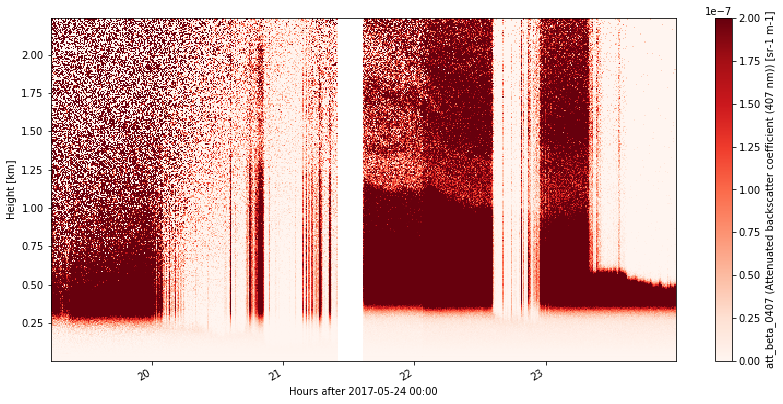

In [75]:
Time, Height = np.meshgrid(time.flatten(), height[:300].flatten())

fig, ax = plt.subplots(1, figsize=(14,7))
ax.set_ylabel('Height [km]')
ax.set_xlabel('Hours after 2017-05-24 00:00')
con = ax.pcolor(Time, Height/1e3, (p.T)[:300,:], cmap=plt.get_cmap('Reds'), vmin=0, vmax=2e-7)
fig.colorbar(con, label=pardescription)
fig.autofmt_xdate()